# **EXERCÍCIO 3**

Tente criar uma rede neural para receber imagens e classificar o tipo de imagem.

Dataset: https://www.kaggle.com/datasets/scolianni/mnistasjpg

Discuta a solução com o professor caso necessário.


In [ ]:
import numpy as np
from tensorflow import keras

import matplotlib.pyplot as plt
import random

from keras.layers import Dense, Flatten
from keras import Sequential

from keras.callbacks import EarlyStopping

import plotly.graph_objects as go

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

7


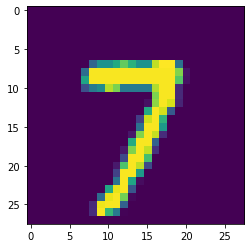

In [ ]:
input_size = x_train.shape[1]*x_train.shape[2]

#Número de amostras
index = random.randrange(0, len(x_train))  # choose an index ;-)

print(y_train[index])
image = np.asarray(x_train[index]).squeeze()
plt.imshow(image)
plt.show()

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
# Exit layer: number of categories (10 for 10 digits)
# On multiclassification projects we use softmax with 10 neurons

# We receive a probability of each digit
# Applying the max() function we can find which digit is in the image

# To use categorical -> how do we create a vector?
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1))) # Lines, columns, channels
model.add(Dense(1024, input_dim=input_size, activation='sigmoid'))
model.add(Dense(256, activation='exponential'))
model.add(Dense(124, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
batch_size = 32
epochs = 225

# Callback call

callback_es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
hist = model.fit(x_train,y_train,epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[callback_es])

Epoch 1/225
1688/1688 [==============================] - 32s 18ms/step - loss: 0.3682 - accuracy: 0.8873 - val_loss: 0.1712 - val_accuracy: 0.9488
Epoch 2/225
1688/1688 [==============================] - 32s 19ms/step - loss: 0.1675 - accuracy: 0.9489 - val_loss: 0.1267 - val_accuracy: 0.9622
Epoch 3/225
1688/1688 [==============================] - 33s 19ms/step - loss: 0.1241 - accuracy: 0.9628 - val_loss: 0.1759 - val_accuracy: 0.9527
Epoch 4/225
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0936 - accuracy: 0.9707 - val_loss: 0.0887 - val_accuracy: 0.9752
Epoch 5/225
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0721 - accuracy: 0.9779 - val_loss: 0.0965 - val_accuracy: 0.9727
Epoch 6/225
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0544 - accuracy: 0.9822 - val_loss: 0.1235 - val_accuracy: 0.9723
Epoch 7/225
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0

In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(y=hist.history['loss'],mode='lines', name='Training'))
fig.add_trace(go.Scatter(y=hist.history['val_loss'],mode='lines', name='Validation'))

fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08075117319822311
Test accuracy: 0.9769999980926514


# Configuração

In [ ]:
# Grupos
grupos = ['criado_por_G1', 'criado_por_G2', 'criado_por_3', 'criado_por_G4', 'criado_por_G5', 'criado_por_G6, criado_por_Tiago']
seu_grupo = 'criado_por_G1' # substitua o x pelo número do seu grupo

In [ ]:
from pathlib import Path

url = 'https://drive.google.com/drive/folders/1FrwYHumOo8GjLe8PvmFGpaot8L95uWwq?usp=sharing'

import gdown
gdown.download_folder(url, quiet=True, remaining_ok = True)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=17vdfIi547QCmK5F218ipmBIJUwukUv2z 



In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
from pathlib import Path

raiz_desafio = Path('/content/digitos_para_teste')

dict_desafios_geral = []

for arq in raiz_desafio.iterdir():
  digito = str(arq).split('.')[0][-1]
  dict_desafios = {}
  dict_desafios['true'] = int(digito)
  dict_desafios['file'] = arq

  im = cv.imread(str(arq.resolve()))
  b,g,r = cv.split(im)
  p = np.array(b).astype('float32')

  dict_desafios['imagem'] = p / 255
  dict_desafios['predito'] = 0

  dict_desafios_geral.append(dict_desafios)

In [ ]:
from pathlib import Path, PurePath
import os
import sys  
  
FILE = Path('/content/digitos_para_teste').resolve()
ROOT_PESSOAS = FILE.parents[0]  
if str(ROOT_PESSOAS) not in sys.path:
    sys.path.append(str(ROOT_PESSOAS))  # add ROOT to PATH
ROOT_PESSOAS_REL = Path(os.path.relpath(ROOT_PESSOAS, Path.cwd()))  # relative
    

## Uso

In [ ]:
predicoes = []
teste = []
acertos = 0

for digito in dict_desafios_geral:
  predicao = model.predict( np.array([digito['imagem'] ]) )
  digito['predito'] = np.argmax(predicao)

  predicoes.append(digito['predito'])
  teste.append(digito['true'])

  if digito['predito'] == digito['true']:
    acertos+=1
    
percentual = acertos/len(teste)
  
print(f'Predições: {predicoes}')
print(f'\nTestes:    {teste}')
print(f'\n--------------------------')
print(f'\nQuantidade de acertos: {acertos}')
print(f'Percentual de acerto: {percentual}')

Predições: [1, 6, 4, 6, 5, 7, 7, 3, 6, 7, 5, 5, 5, 7, 6, 7, 5, 3, 3, 3, 3, 3, 5, 0, 1, 3, 4, 2, 5, 6, 1, 4, 1, 1, 3, 3, 1, 9, 8, 7, 2, 3, 4, 7, 7, 5, 5, 7, 1, 5]

Testes:    [2, 5, 4, 6, 1, 2, 3, 3, 6, 2, 5, 0, 8, 7, 2, 3, 5, 7, 9, 9, 1, 8, 1, 0, 3, 3, 6, 4, 5, 6, 1, 6, 4, 5, 1, 9, 9, 7, 9, 4, 3, 8, 4, 7, 3, 4, 1, 0, 2, 5]

--------------------------

Quantidade de acertos: 15
Percentual de acerto: 0.3


# Salvando modelo

In [ ]:
model.save("/content/drive/MyDrive/Insper/6_semestre/computer_vision/Batalha_Redes/ANN/modelo_ann")

In [ ]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/Insper/6_semestre/computer_vision/Batalha_Redes/ANN/modelo_ann")

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 1024)              803840    
                                                                 
 dense_17 (Dense)            (None, 256)               262400    
                                                                 
 dense_18 (Dense)            (None, 124)               31868     
                                                                 
 dense_19 (Dense)            (None, 10)                1250      
                                                                 
Total params: 1,099,358
Trainable params: 1,099,358
Non-trainable params: 0
_________________________________________________________________


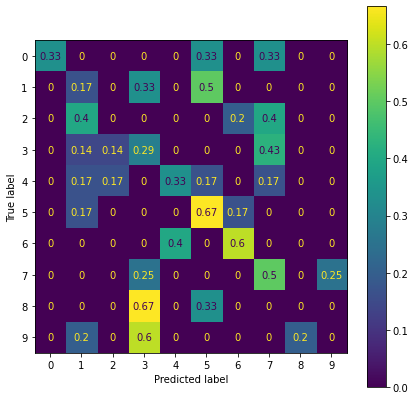

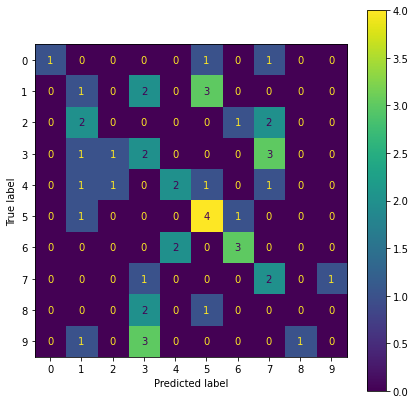

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predict_class = np.array(predicoes) > 0.1

cm = confusion_matrix(teste, predicoes, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)
plt.show()

cm = confusion_matrix(teste, predicoes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)
plt.show()